# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

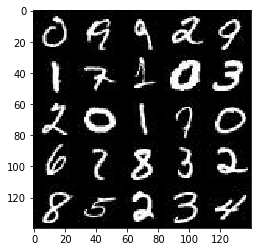

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

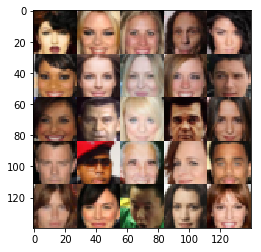

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, (None, image_width,image_height,image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate=tf.placeholder(tf.float32,name="learning_rate")
    
    return input_real,input_z,learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # DONE: Implement Function
    keep_prob=0.9
    alpha=0.1
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, kernel_size=(5,5), strides=(2,2), padding='same',activation=None)
        #x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(x1, 128, kernel_size=(5,5), strides=(2,2), padding='same',activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        #x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        # 7x7x128
        
        x3 = tf.layers.conv2d(x2, 256, kernel_size=(5,5), strides=(1,1), padding='same',activation=None)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        #x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        # 7x7x256

        # Flatten it
        flat = tf.reshape(x3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
        


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # DONE: Implement Function
    
    alpha=0.1
    keep_prob=0.9
    with tf.variable_scope('generator', reuse=not is_train):       
        x1 = tf.layers.dense(z,units=7*7*256)
        x1 = tf.reshape(x1,[-1,7,7,256])
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # Output 7x7x256
       
        # First convolutional layer. We use transpose because the strides are inverted : we make theimage bigger
        x2 = tf.layers.conv2d_transpose(x1, 128, kernel_size=(5,5), strides=(2,2), padding='same',activation=None)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2,x2)
        #x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        # Output 14x14x128
        
        # Second convolutional layer. We use transpose because the strides are inverted : we make theimage bigger
        x3 = tf.layers.conv2d_transpose(x2, 64, kernel_size=(5,5), strides=(2,2), padding='same',activation=None)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3,x3)
        #x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        # Output : 28*28*64
        
        # Third convolutional layer. We use transpose because the strides are inverted : we make theimage bigger
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, kernel_size=(3,3), strides=(1,1), padding='same',activation=None)
        #x4 = tf.layers.batch_normalization(x4, training=is_train)
        #logits = tf.maximum(alpha*x4,x4)
        
        # Output 28x28xout_channel_dim
        
        
        out = tf.tanh(logits) 
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # DONE: Implement Function
    smooth=0.1
    gen_model = generator(input_z, out_channel_dim)
    disc_output_real, disc_logits_real = discriminator(input_real)
    disc_output_fake, disc_logits_fake = discriminator(gen_model, reuse=True)

    disc_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=disc_logits_real, 
            labels=tf.ones_like(disc_output_real)*(1-smooth)
        )
    )
    
    disc_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=disc_logits_fake, 
            labels=tf.zeros_like(disc_output_fake)
        )
    )
    
    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=disc_logits_fake, 
            labels=tf.ones_like(disc_output_fake)
        )
    )

    disc_loss = disc_loss_real + disc_loss_fake
    
    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # DONE: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    #print(t_vars)
    #print(d_vars)
    #print(g_vars)

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # DONE: Build Model
    #print(data_shape)
    steps=0
    

    
    _, image_width, image_height, image_channels = data_shape
    input_real,input_z,learnrate=model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt,g_train_opt=model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                #batch_images = batch_images.reshape((batch_size, data_shape[1], data_shape[2], data_shape[3]))
                # the division by two is to have outputs within range -0.5 - 0.5_images.))
                batch_images = batch_images * 2.0 
                
                # Sample random noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run Optimizers
                
                _ = sess.run(d_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, learnrate: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, learnrate: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, learnrate: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, learnrate: learning_rate})
                
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{} Step {}...".format(epoch_i+1, epoch_count,steps), 
                      "Discriminator Loss: {:.4f}...".format(train_loss_d), 
                      "Generator Loss: {:.4f}...".format(train_loss_g))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

initial output:


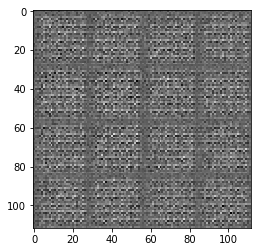

Epoch 1/2 Step 10... Discriminator Loss: 3.3721... Generator Loss: 0.0660...
Epoch 1/2 Step 20... Discriminator Loss: 3.0251... Generator Loss: 0.2151...
Epoch 1/2 Step 30... Discriminator Loss: 2.1567... Generator Loss: 0.2707...
Epoch 1/2 Step 40... Discriminator Loss: 2.0815... Generator Loss: 0.2470...
Epoch 1/2 Step 50... Discriminator Loss: 2.1774... Generator Loss: 0.2199...
Epoch 1/2 Step 60... Discriminator Loss: 1.9214... Generator Loss: 0.2949...
Epoch 1/2 Step 70... Discriminator Loss: 1.6062... Generator Loss: 0.8630...
Epoch 1/2 Step 80... Discriminator Loss: 1.6206... Generator Loss: 0.7720...
Epoch 1/2 Step 90... Discriminator Loss: 1.6791... Generator Loss: 1.2282...
Epoch 1/2 Step 100... Discriminator Loss: 1.4756... Generator Loss: 0.6734...


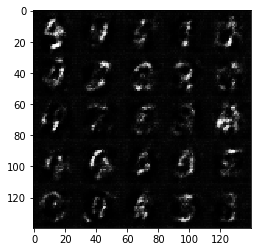

Epoch 1/2 Step 110... Discriminator Loss: 1.5914... Generator Loss: 1.2148...
Epoch 1/2 Step 120... Discriminator Loss: 1.5096... Generator Loss: 0.8794...
Epoch 1/2 Step 130... Discriminator Loss: 1.3990... Generator Loss: 0.6864...
Epoch 1/2 Step 140... Discriminator Loss: 1.6906... Generator Loss: 1.1667...
Epoch 1/2 Step 150... Discriminator Loss: 1.7548... Generator Loss: 0.3302...
Epoch 1/2 Step 160... Discriminator Loss: 1.6254... Generator Loss: 0.7549...
Epoch 1/2 Step 170... Discriminator Loss: 1.7395... Generator Loss: 0.3570...
Epoch 1/2 Step 180... Discriminator Loss: 1.6067... Generator Loss: 0.4855...
Epoch 1/2 Step 190... Discriminator Loss: 1.5809... Generator Loss: 0.6273...
Epoch 1/2 Step 200... Discriminator Loss: 1.6569... Generator Loss: 0.8654...


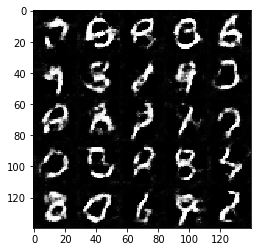

Epoch 1/2 Step 210... Discriminator Loss: 1.6267... Generator Loss: 0.4243...
Epoch 1/2 Step 220... Discriminator Loss: 2.0483... Generator Loss: 0.2270...
Epoch 1/2 Step 230... Discriminator Loss: 1.6233... Generator Loss: 0.7597...
Epoch 1/2 Step 240... Discriminator Loss: 1.4858... Generator Loss: 0.6778...
Epoch 1/2 Step 250... Discriminator Loss: 1.6653... Generator Loss: 0.4278...
Epoch 1/2 Step 260... Discriminator Loss: 1.7580... Generator Loss: 0.3608...
Epoch 1/2 Step 270... Discriminator Loss: 1.9132... Generator Loss: 0.2749...
Epoch 1/2 Step 280... Discriminator Loss: 1.6001... Generator Loss: 0.5809...
Epoch 1/2 Step 290... Discriminator Loss: 1.8161... Generator Loss: 0.3269...
Epoch 1/2 Step 300... Discriminator Loss: 1.6030... Generator Loss: 0.9523...


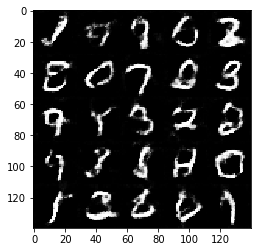

Epoch 1/2 Step 310... Discriminator Loss: 1.5636... Generator Loss: 0.9508...
Epoch 1/2 Step 320... Discriminator Loss: 1.5460... Generator Loss: 0.5461...
Epoch 1/2 Step 330... Discriminator Loss: 1.6715... Generator Loss: 0.3932...
Epoch 1/2 Step 340... Discriminator Loss: 1.7074... Generator Loss: 0.3899...
Epoch 1/2 Step 350... Discriminator Loss: 1.5550... Generator Loss: 1.0886...
Epoch 1/2 Step 360... Discriminator Loss: 1.5011... Generator Loss: 0.7038...
Epoch 1/2 Step 370... Discriminator Loss: 1.6643... Generator Loss: 1.2078...
Epoch 1/2 Step 380... Discriminator Loss: 1.5935... Generator Loss: 0.5893...
Epoch 1/2 Step 390... Discriminator Loss: 1.4826... Generator Loss: 0.8590...
Epoch 1/2 Step 400... Discriminator Loss: 1.4626... Generator Loss: 0.7498...


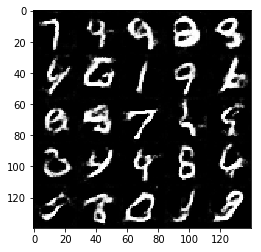

Epoch 1/2 Step 410... Discriminator Loss: 1.5209... Generator Loss: 0.6335...
Epoch 1/2 Step 420... Discriminator Loss: 1.5444... Generator Loss: 0.5470...
Epoch 1/2 Step 430... Discriminator Loss: 1.7847... Generator Loss: 0.3226...
Epoch 1/2 Step 440... Discriminator Loss: 1.5081... Generator Loss: 0.7644...
Epoch 1/2 Step 450... Discriminator Loss: 1.5326... Generator Loss: 0.8795...
Epoch 1/2 Step 460... Discriminator Loss: 1.5679... Generator Loss: 0.4885...
Epoch 2/2 Step 470... Discriminator Loss: 1.6800... Generator Loss: 0.3660...
Epoch 2/2 Step 480... Discriminator Loss: 1.5400... Generator Loss: 0.9679...
Epoch 2/2 Step 490... Discriminator Loss: 1.5030... Generator Loss: 0.8278...
Epoch 2/2 Step 500... Discriminator Loss: 1.6705... Generator Loss: 0.3834...


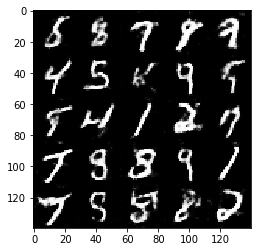

Epoch 2/2 Step 510... Discriminator Loss: 1.4358... Generator Loss: 0.6296...
Epoch 2/2 Step 520... Discriminator Loss: 1.5852... Generator Loss: 0.4527...
Epoch 2/2 Step 530... Discriminator Loss: 1.7262... Generator Loss: 0.3570...
Epoch 2/2 Step 540... Discriminator Loss: 1.5125... Generator Loss: 0.8770...
Epoch 2/2 Step 550... Discriminator Loss: 1.4271... Generator Loss: 0.6962...
Epoch 2/2 Step 560... Discriminator Loss: 1.4815... Generator Loss: 0.7910...
Epoch 2/2 Step 570... Discriminator Loss: 1.7140... Generator Loss: 0.3572...
Epoch 2/2 Step 580... Discriminator Loss: 1.6478... Generator Loss: 0.4056...
Epoch 2/2 Step 590... Discriminator Loss: 1.6452... Generator Loss: 0.4099...
Epoch 2/2 Step 600... Discriminator Loss: 1.4861... Generator Loss: 0.5224...


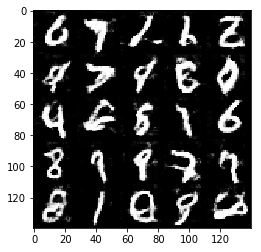

Epoch 2/2 Step 610... Discriminator Loss: 1.9039... Generator Loss: 0.2681...
Epoch 2/2 Step 620... Discriminator Loss: 1.5827... Generator Loss: 0.8274...
Epoch 2/2 Step 630... Discriminator Loss: 1.5506... Generator Loss: 0.4916...
Epoch 2/2 Step 640... Discriminator Loss: 1.5097... Generator Loss: 0.7033...
Epoch 2/2 Step 650... Discriminator Loss: 1.4831... Generator Loss: 0.5390...
Epoch 2/2 Step 660... Discriminator Loss: 1.5611... Generator Loss: 0.4705...
Epoch 2/2 Step 670... Discriminator Loss: 1.5661... Generator Loss: 0.5101...
Epoch 2/2 Step 680... Discriminator Loss: 1.6202... Generator Loss: 0.4341...
Epoch 2/2 Step 690... Discriminator Loss: 1.5148... Generator Loss: 0.5951...
Epoch 2/2 Step 700... Discriminator Loss: 1.5780... Generator Loss: 0.8895...


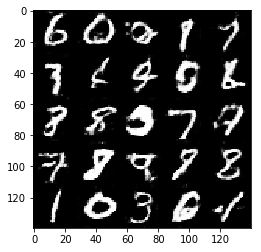

Epoch 2/2 Step 710... Discriminator Loss: 1.7423... Generator Loss: 0.8657...
Epoch 2/2 Step 720... Discriminator Loss: 1.5150... Generator Loss: 0.5097...
Epoch 2/2 Step 730... Discriminator Loss: 1.4707... Generator Loss: 0.6499...
Epoch 2/2 Step 740... Discriminator Loss: 1.5161... Generator Loss: 0.6854...
Epoch 2/2 Step 750... Discriminator Loss: 1.4802... Generator Loss: 0.6136...
Epoch 2/2 Step 760... Discriminator Loss: 1.4690... Generator Loss: 0.6990...
Epoch 2/2 Step 770... Discriminator Loss: 1.7195... Generator Loss: 0.3825...
Epoch 2/2 Step 780... Discriminator Loss: 1.5273... Generator Loss: 0.6624...
Epoch 2/2 Step 790... Discriminator Loss: 1.4934... Generator Loss: 0.6259...
Epoch 2/2 Step 800... Discriminator Loss: 1.4466... Generator Loss: 0.8198...


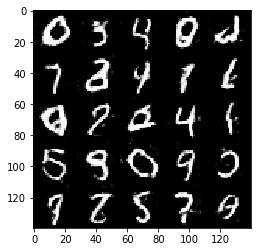

Epoch 2/2 Step 810... Discriminator Loss: 1.7812... Generator Loss: 0.3192...
Epoch 2/2 Step 820... Discriminator Loss: 1.5827... Generator Loss: 0.4719...
Epoch 2/2 Step 830... Discriminator Loss: 1.5165... Generator Loss: 0.5400...
Epoch 2/2 Step 840... Discriminator Loss: 1.5528... Generator Loss: 0.4694...
Epoch 2/2 Step 850... Discriminator Loss: 1.4962... Generator Loss: 0.6527...
Epoch 2/2 Step 860... Discriminator Loss: 1.9371... Generator Loss: 1.2672...
Epoch 2/2 Step 870... Discriminator Loss: 1.5347... Generator Loss: 0.6479...
Epoch 2/2 Step 880... Discriminator Loss: 1.4453... Generator Loss: 0.8895...
Epoch 2/2 Step 890... Discriminator Loss: 1.5829... Generator Loss: 0.4303...
Epoch 2/2 Step 900... Discriminator Loss: 1.5160... Generator Loss: 0.5047...


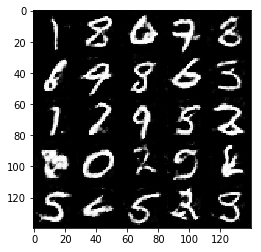

Epoch 2/2 Step 910... Discriminator Loss: 1.5370... Generator Loss: 0.5571...
Epoch 2/2 Step 920... Discriminator Loss: 1.7951... Generator Loss: 1.5191...
Epoch 2/2 Step 930... Discriminator Loss: 1.4446... Generator Loss: 0.5886...


In [14]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
#print(mnist_dataset.shape)
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

initial output:


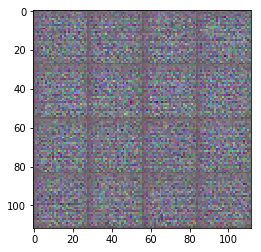

Epoch 1/1 Step 10... Discriminator Loss: 3.9192... Generator Loss: 0.0369...
Epoch 1/1 Step 20... Discriminator Loss: 5.7585... Generator Loss: 0.0065...
Epoch 1/1 Step 30... Discriminator Loss: 3.7930... Generator Loss: 0.0643...
Epoch 1/1 Step 40... Discriminator Loss: 1.8673... Generator Loss: 1.3326...
Epoch 1/1 Step 50... Discriminator Loss: 5.8050... Generator Loss: 0.0058...
Epoch 1/1 Step 60... Discriminator Loss: 2.8970... Generator Loss: 0.2337...
Epoch 1/1 Step 70... Discriminator Loss: 2.5770... Generator Loss: 0.3053...
Epoch 1/1 Step 80... Discriminator Loss: 2.6661... Generator Loss: 0.2876...
Epoch 1/1 Step 90... Discriminator Loss: 2.2791... Generator Loss: 0.3343...
Epoch 1/1 Step 100... Discriminator Loss: 1.9596... Generator Loss: 0.3968...


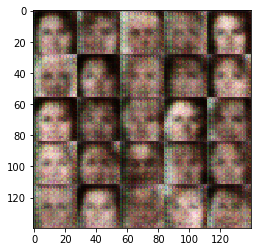

Epoch 1/1 Step 110... Discriminator Loss: 2.1302... Generator Loss: 0.3332...
Epoch 1/1 Step 120... Discriminator Loss: 1.9620... Generator Loss: 0.3343...
Epoch 1/1 Step 130... Discriminator Loss: 1.8246... Generator Loss: 0.4793...
Epoch 1/1 Step 140... Discriminator Loss: 1.9645... Generator Loss: 0.4048...
Epoch 1/1 Step 150... Discriminator Loss: 2.5362... Generator Loss: 0.2410...
Epoch 1/1 Step 160... Discriminator Loss: 1.7430... Generator Loss: 0.5016...
Epoch 1/1 Step 170... Discriminator Loss: 2.3097... Generator Loss: 0.3210...
Epoch 1/1 Step 180... Discriminator Loss: 1.7915... Generator Loss: 0.4234...
Epoch 1/1 Step 190... Discriminator Loss: 1.9063... Generator Loss: 0.3144...
Epoch 1/1 Step 200... Discriminator Loss: 2.0253... Generator Loss: 0.3406...


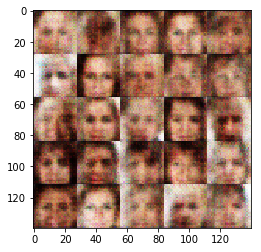

Epoch 1/1 Step 210... Discriminator Loss: 2.3486... Generator Loss: 0.2595...
Epoch 1/1 Step 220... Discriminator Loss: 1.7051... Generator Loss: 0.5095...
Epoch 1/1 Step 230... Discriminator Loss: 2.0711... Generator Loss: 0.4351...
Epoch 1/1 Step 240... Discriminator Loss: 2.0802... Generator Loss: 0.3301...
Epoch 1/1 Step 250... Discriminator Loss: 2.1047... Generator Loss: 0.3251...
Epoch 1/1 Step 260... Discriminator Loss: 1.7583... Generator Loss: 0.4191...
Epoch 1/1 Step 270... Discriminator Loss: 1.8630... Generator Loss: 0.3796...
Epoch 1/1 Step 280... Discriminator Loss: 1.8623... Generator Loss: 0.4371...
Epoch 1/1 Step 290... Discriminator Loss: 1.9627... Generator Loss: 0.5166...
Epoch 1/1 Step 300... Discriminator Loss: 1.8219... Generator Loss: 0.4323...


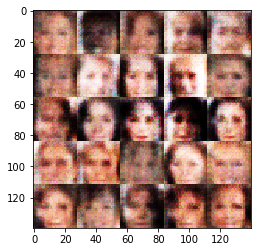

Epoch 1/1 Step 310... Discriminator Loss: 1.6622... Generator Loss: 0.5100...
Epoch 1/1 Step 320... Discriminator Loss: 1.7737... Generator Loss: 0.4971...
Epoch 1/1 Step 330... Discriminator Loss: 1.7699... Generator Loss: 0.4932...
Epoch 1/1 Step 340... Discriminator Loss: 1.6651... Generator Loss: 0.6113...
Epoch 1/1 Step 350... Discriminator Loss: 1.7794... Generator Loss: 0.4984...
Epoch 1/1 Step 360... Discriminator Loss: 1.7864... Generator Loss: 0.4595...
Epoch 1/1 Step 370... Discriminator Loss: 1.6397... Generator Loss: 0.6184...
Epoch 1/1 Step 380... Discriminator Loss: 1.7487... Generator Loss: 0.5710...
Epoch 1/1 Step 390... Discriminator Loss: 1.5058... Generator Loss: 0.6243...
Epoch 1/1 Step 400... Discriminator Loss: 1.7788... Generator Loss: 0.4330...


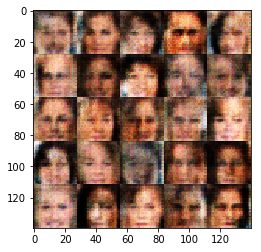

Epoch 1/1 Step 410... Discriminator Loss: 1.6384... Generator Loss: 0.5187...
Epoch 1/1 Step 420... Discriminator Loss: 1.6266... Generator Loss: 0.5939...
Epoch 1/1 Step 430... Discriminator Loss: 1.5957... Generator Loss: 0.5019...
Epoch 1/1 Step 440... Discriminator Loss: 1.6981... Generator Loss: 0.4573...
Epoch 1/1 Step 450... Discriminator Loss: 1.7612... Generator Loss: 0.4869...
Epoch 1/1 Step 460... Discriminator Loss: 1.7199... Generator Loss: 0.5082...
Epoch 1/1 Step 470... Discriminator Loss: 1.5377... Generator Loss: 0.6334...
Epoch 1/1 Step 480... Discriminator Loss: 1.7886... Generator Loss: 0.5323...
Epoch 1/1 Step 490... Discriminator Loss: 1.7359... Generator Loss: 0.6146...
Epoch 1/1 Step 500... Discriminator Loss: 1.6176... Generator Loss: 0.6813...


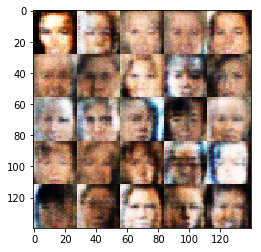

Epoch 1/1 Step 510... Discriminator Loss: 1.6125... Generator Loss: 0.5645...
Epoch 1/1 Step 520... Discriminator Loss: 1.5690... Generator Loss: 0.5144...
Epoch 1/1 Step 530... Discriminator Loss: 1.6084... Generator Loss: 0.5236...
Epoch 1/1 Step 540... Discriminator Loss: 1.5460... Generator Loss: 0.6621...
Epoch 1/1 Step 550... Discriminator Loss: 1.5851... Generator Loss: 0.6563...
Epoch 1/1 Step 560... Discriminator Loss: 1.6848... Generator Loss: 0.5228...
Epoch 1/1 Step 570... Discriminator Loss: 1.6700... Generator Loss: 0.5092...
Epoch 1/1 Step 580... Discriminator Loss: 1.6444... Generator Loss: 0.5758...
Epoch 1/1 Step 590... Discriminator Loss: 1.6932... Generator Loss: 0.4831...
Epoch 1/1 Step 600... Discriminator Loss: 1.6590... Generator Loss: 0.5946...


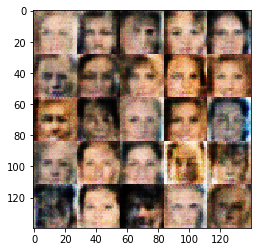

Epoch 1/1 Step 610... Discriminator Loss: 1.5490... Generator Loss: 0.6086...
Epoch 1/1 Step 620... Discriminator Loss: 1.6666... Generator Loss: 0.5769...
Epoch 1/1 Step 630... Discriminator Loss: 1.5414... Generator Loss: 0.6389...
Epoch 1/1 Step 640... Discriminator Loss: 1.6502... Generator Loss: 0.6225...
Epoch 1/1 Step 650... Discriminator Loss: 1.5246... Generator Loss: 0.6280...
Epoch 1/1 Step 660... Discriminator Loss: 1.5885... Generator Loss: 0.5508...
Epoch 1/1 Step 670... Discriminator Loss: 1.4224... Generator Loss: 0.7037...
Epoch 1/1 Step 680... Discriminator Loss: 1.5685... Generator Loss: 0.6461...
Epoch 1/1 Step 690... Discriminator Loss: 1.5055... Generator Loss: 0.7067...
Epoch 1/1 Step 700... Discriminator Loss: 1.7201... Generator Loss: 0.5460...


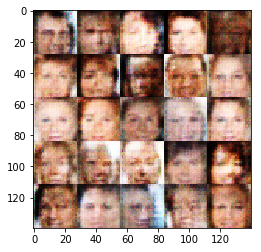

Epoch 1/1 Step 710... Discriminator Loss: 1.6218... Generator Loss: 0.6147...
Epoch 1/1 Step 720... Discriminator Loss: 1.5994... Generator Loss: 0.6883...
Epoch 1/1 Step 730... Discriminator Loss: 1.6259... Generator Loss: 0.5422...
Epoch 1/1 Step 740... Discriminator Loss: 1.5852... Generator Loss: 0.5952...
Epoch 1/1 Step 750... Discriminator Loss: 1.8081... Generator Loss: 0.5935...
Epoch 1/1 Step 760... Discriminator Loss: 1.6360... Generator Loss: 0.5523...
Epoch 1/1 Step 770... Discriminator Loss: 1.6577... Generator Loss: 0.5183...
Epoch 1/1 Step 780... Discriminator Loss: 1.6480... Generator Loss: 0.5510...
Epoch 1/1 Step 790... Discriminator Loss: 1.5976... Generator Loss: 0.5693...
Epoch 1/1 Step 800... Discriminator Loss: 1.5966... Generator Loss: 0.6615...


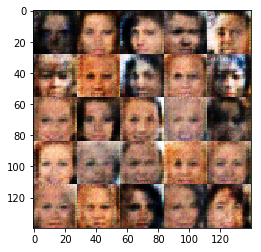

Epoch 1/1 Step 810... Discriminator Loss: 1.5151... Generator Loss: 0.6374...
Epoch 1/1 Step 820... Discriminator Loss: 1.6214... Generator Loss: 0.6275...
Epoch 1/1 Step 830... Discriminator Loss: 1.5684... Generator Loss: 0.5792...
Epoch 1/1 Step 840... Discriminator Loss: 1.5427... Generator Loss: 0.6562...
Epoch 1/1 Step 850... Discriminator Loss: 1.6556... Generator Loss: 0.6128...
Epoch 1/1 Step 860... Discriminator Loss: 1.6273... Generator Loss: 0.6216...
Epoch 1/1 Step 870... Discriminator Loss: 1.5589... Generator Loss: 0.6067...
Epoch 1/1 Step 880... Discriminator Loss: 1.5975... Generator Loss: 0.5958...
Epoch 1/1 Step 890... Discriminator Loss: 1.5684... Generator Loss: 0.6831...
Epoch 1/1 Step 900... Discriminator Loss: 1.6075... Generator Loss: 0.6402...


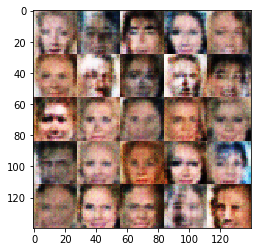

Epoch 1/1 Step 910... Discriminator Loss: 1.6024... Generator Loss: 0.6127...
Epoch 1/1 Step 920... Discriminator Loss: 1.4828... Generator Loss: 0.7006...
Epoch 1/1 Step 930... Discriminator Loss: 1.4766... Generator Loss: 0.6795...
Epoch 1/1 Step 940... Discriminator Loss: 1.5994... Generator Loss: 0.5786...
Epoch 1/1 Step 950... Discriminator Loss: 1.5568... Generator Loss: 0.6596...
Epoch 1/1 Step 960... Discriminator Loss: 1.6050... Generator Loss: 0.6980...
Epoch 1/1 Step 970... Discriminator Loss: 1.6478... Generator Loss: 0.6918...
Epoch 1/1 Step 980... Discriminator Loss: 1.6273... Generator Loss: 0.5418...
Epoch 1/1 Step 990... Discriminator Loss: 1.7072... Generator Loss: 0.6231...
Epoch 1/1 Step 1000... Discriminator Loss: 1.5662... Generator Loss: 0.6127...


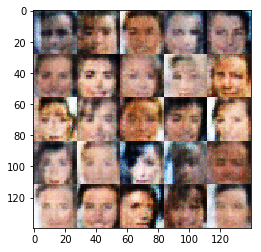

Epoch 1/1 Step 1010... Discriminator Loss: 1.5356... Generator Loss: 0.7090...
Epoch 1/1 Step 1020... Discriminator Loss: 1.5910... Generator Loss: 0.5963...
Epoch 1/1 Step 1030... Discriminator Loss: 1.5184... Generator Loss: 0.5773...
Epoch 1/1 Step 1040... Discriminator Loss: 1.5848... Generator Loss: 0.5796...
Epoch 1/1 Step 1050... Discriminator Loss: 1.5667... Generator Loss: 0.6790...
Epoch 1/1 Step 1060... Discriminator Loss: 1.5167... Generator Loss: 0.6013...
Epoch 1/1 Step 1070... Discriminator Loss: 1.5545... Generator Loss: 0.5224...
Epoch 1/1 Step 1080... Discriminator Loss: 1.5391... Generator Loss: 0.6295...
Epoch 1/1 Step 1090... Discriminator Loss: 1.5717... Generator Loss: 0.5968...
Epoch 1/1 Step 1100... Discriminator Loss: 1.5769... Generator Loss: 0.6108...


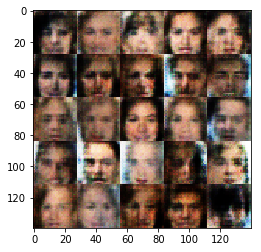

Epoch 1/1 Step 1110... Discriminator Loss: 1.4677... Generator Loss: 0.6886...
Epoch 1/1 Step 1120... Discriminator Loss: 1.5606... Generator Loss: 0.6536...
Epoch 1/1 Step 1130... Discriminator Loss: 1.5764... Generator Loss: 0.6527...
Epoch 1/1 Step 1140... Discriminator Loss: 1.6719... Generator Loss: 0.6011...
Epoch 1/1 Step 1150... Discriminator Loss: 1.5504... Generator Loss: 0.6475...
Epoch 1/1 Step 1160... Discriminator Loss: 1.6102... Generator Loss: 0.5804...
Epoch 1/1 Step 1170... Discriminator Loss: 1.5520... Generator Loss: 0.6363...
Epoch 1/1 Step 1180... Discriminator Loss: 1.6209... Generator Loss: 0.5624...
Epoch 1/1 Step 1190... Discriminator Loss: 1.4803... Generator Loss: 0.6673...
Epoch 1/1 Step 1200... Discriminator Loss: 1.5602... Generator Loss: 0.6634...


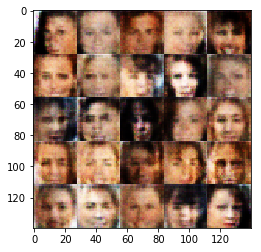

Epoch 1/1 Step 1210... Discriminator Loss: 1.5844... Generator Loss: 0.5932...
Epoch 1/1 Step 1220... Discriminator Loss: 1.4374... Generator Loss: 0.7274...
Epoch 1/1 Step 1230... Discriminator Loss: 1.6853... Generator Loss: 0.5388...
Epoch 1/1 Step 1240... Discriminator Loss: 1.5369... Generator Loss: 0.7765...
Epoch 1/1 Step 1250... Discriminator Loss: 1.5933... Generator Loss: 0.6838...
Epoch 1/1 Step 1260... Discriminator Loss: 1.4743... Generator Loss: 0.7049...
Epoch 1/1 Step 1270... Discriminator Loss: 1.5899... Generator Loss: 0.6026...
Epoch 1/1 Step 1280... Discriminator Loss: 1.4790... Generator Loss: 0.7814...
Epoch 1/1 Step 1290... Discriminator Loss: 1.6635... Generator Loss: 0.5811...
Epoch 1/1 Step 1300... Discriminator Loss: 1.4816... Generator Loss: 0.6891...


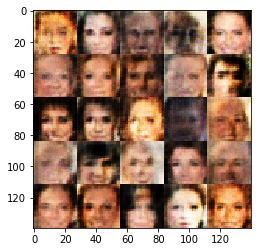

Epoch 1/1 Step 1310... Discriminator Loss: 1.4887... Generator Loss: 0.7169...
Epoch 1/1 Step 1320... Discriminator Loss: 1.6057... Generator Loss: 0.5624...
Epoch 1/1 Step 1330... Discriminator Loss: 1.5819... Generator Loss: 0.5760...
Epoch 1/1 Step 1340... Discriminator Loss: 1.4952... Generator Loss: 0.6170...
Epoch 1/1 Step 1350... Discriminator Loss: 1.4800... Generator Loss: 0.6676...
Epoch 1/1 Step 1360... Discriminator Loss: 1.5508... Generator Loss: 0.6665...
Epoch 1/1 Step 1370... Discriminator Loss: 1.5639... Generator Loss: 0.6984...
Epoch 1/1 Step 1380... Discriminator Loss: 1.4853... Generator Loss: 0.6175...
Epoch 1/1 Step 1390... Discriminator Loss: 1.5590... Generator Loss: 0.6069...
Epoch 1/1 Step 1400... Discriminator Loss: 1.5170... Generator Loss: 0.6592...


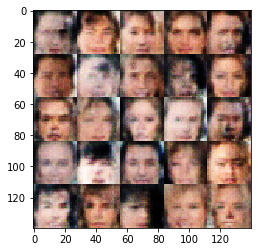

Epoch 1/1 Step 1410... Discriminator Loss: 1.5646... Generator Loss: 0.6267...
Epoch 1/1 Step 1420... Discriminator Loss: 1.6901... Generator Loss: 0.5485...
Epoch 1/1 Step 1430... Discriminator Loss: 1.6233... Generator Loss: 0.6275...
Epoch 1/1 Step 1440... Discriminator Loss: 1.5782... Generator Loss: 0.6304...
Epoch 1/1 Step 1450... Discriminator Loss: 1.5281... Generator Loss: 0.6148...
Epoch 1/1 Step 1460... Discriminator Loss: 1.5791... Generator Loss: 0.6180...
Epoch 1/1 Step 1470... Discriminator Loss: 1.5252... Generator Loss: 0.6548...
Epoch 1/1 Step 1480... Discriminator Loss: 1.5591... Generator Loss: 0.6134...
Epoch 1/1 Step 1490... Discriminator Loss: 1.5214... Generator Loss: 0.7153...
Epoch 1/1 Step 1500... Discriminator Loss: 1.5126... Generator Loss: 0.6143...


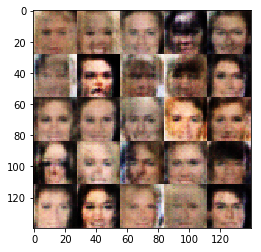

Epoch 1/1 Step 1510... Discriminator Loss: 1.5003... Generator Loss: 0.6511...
Epoch 1/1 Step 1520... Discriminator Loss: 1.6174... Generator Loss: 0.6176...
Epoch 1/1 Step 1530... Discriminator Loss: 1.4969... Generator Loss: 0.7044...
Epoch 1/1 Step 1540... Discriminator Loss: 1.4978... Generator Loss: 0.6883...
Epoch 1/1 Step 1550... Discriminator Loss: 1.5242... Generator Loss: 0.5825...
Epoch 1/1 Step 1560... Discriminator Loss: 1.6891... Generator Loss: 0.4900...
Epoch 1/1 Step 1570... Discriminator Loss: 1.6050... Generator Loss: 0.5885...
Epoch 1/1 Step 1580... Discriminator Loss: 1.5013... Generator Loss: 0.5800...
Epoch 1/1 Step 1590... Discriminator Loss: 1.5571... Generator Loss: 0.6590...
Epoch 1/1 Step 1600... Discriminator Loss: 1.4439... Generator Loss: 0.7782...


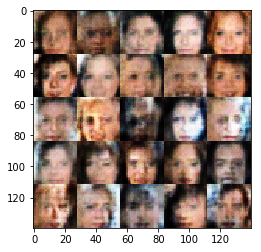

Epoch 1/1 Step 1610... Discriminator Loss: 1.4871... Generator Loss: 0.6466...
Epoch 1/1 Step 1620... Discriminator Loss: 1.5147... Generator Loss: 0.6743...
Epoch 1/1 Step 1630... Discriminator Loss: 1.4925... Generator Loss: 0.6362...
Epoch 1/1 Step 1640... Discriminator Loss: 1.5189... Generator Loss: 0.6067...
Epoch 1/1 Step 1650... Discriminator Loss: 1.5372... Generator Loss: 0.6680...
Epoch 1/1 Step 1660... Discriminator Loss: 1.4754... Generator Loss: 0.5998...
Epoch 1/1 Step 1670... Discriminator Loss: 1.4493... Generator Loss: 0.6850...
Epoch 1/1 Step 1680... Discriminator Loss: 1.5292... Generator Loss: 0.7395...
Epoch 1/1 Step 1690... Discriminator Loss: 1.4858... Generator Loss: 0.6518...
Epoch 1/1 Step 1700... Discriminator Loss: 1.5230... Generator Loss: 0.6314...


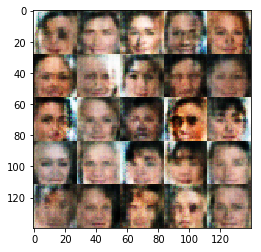

Epoch 1/1 Step 1710... Discriminator Loss: 1.4874... Generator Loss: 0.6568...
Epoch 1/1 Step 1720... Discriminator Loss: 1.4909... Generator Loss: 0.7685...
Epoch 1/1 Step 1730... Discriminator Loss: 1.5326... Generator Loss: 0.7515...
Epoch 1/1 Step 1740... Discriminator Loss: 1.4769... Generator Loss: 0.7356...
Epoch 1/1 Step 1750... Discriminator Loss: 1.5485... Generator Loss: 0.7319...
Epoch 1/1 Step 1760... Discriminator Loss: 1.5846... Generator Loss: 0.5975...
Epoch 1/1 Step 1770... Discriminator Loss: 1.5578... Generator Loss: 0.7165...
Epoch 1/1 Step 1780... Discriminator Loss: 1.4246... Generator Loss: 0.7462...
Epoch 1/1 Step 1790... Discriminator Loss: 1.5050... Generator Loss: 0.7864...
Epoch 1/1 Step 1800... Discriminator Loss: 1.4648... Generator Loss: 0.6368...


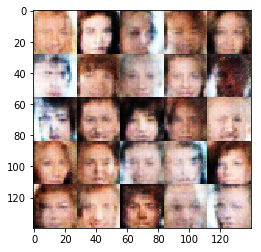

Epoch 1/1 Step 1810... Discriminator Loss: 1.4536... Generator Loss: 0.7051...
Epoch 1/1 Step 1820... Discriminator Loss: 1.5341... Generator Loss: 0.6604...
Epoch 1/1 Step 1830... Discriminator Loss: 1.5342... Generator Loss: 0.6247...
Epoch 1/1 Step 1840... Discriminator Loss: 1.4741... Generator Loss: 0.6887...
Epoch 1/1 Step 1850... Discriminator Loss: 1.5431... Generator Loss: 0.6274...
Epoch 1/1 Step 1860... Discriminator Loss: 1.5974... Generator Loss: 0.5725...
Epoch 1/1 Step 1870... Discriminator Loss: 1.5469... Generator Loss: 0.6021...
Epoch 1/1 Step 1880... Discriminator Loss: 1.4333... Generator Loss: 0.6901...
Epoch 1/1 Step 1890... Discriminator Loss: 1.5324... Generator Loss: 0.6454...
Epoch 1/1 Step 1900... Discriminator Loss: 1.5215... Generator Loss: 0.7375...


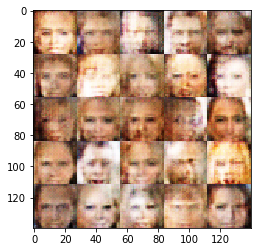

Epoch 1/1 Step 1910... Discriminator Loss: 1.5595... Generator Loss: 0.6300...
Epoch 1/1 Step 1920... Discriminator Loss: 1.5487... Generator Loss: 0.7043...
Epoch 1/1 Step 1930... Discriminator Loss: 1.4638... Generator Loss: 0.6486...
Epoch 1/1 Step 1940... Discriminator Loss: 1.5392... Generator Loss: 0.6286...
Epoch 1/1 Step 1950... Discriminator Loss: 1.5761... Generator Loss: 0.6000...
Epoch 1/1 Step 1960... Discriminator Loss: 1.4730... Generator Loss: 0.7680...
Epoch 1/1 Step 1970... Discriminator Loss: 1.5045... Generator Loss: 0.6230...
Epoch 1/1 Step 1980... Discriminator Loss: 1.4697... Generator Loss: 0.6521...
Epoch 1/1 Step 1990... Discriminator Loss: 1.4137... Generator Loss: 0.7614...
Epoch 1/1 Step 2000... Discriminator Loss: 1.4814... Generator Loss: 0.7395...


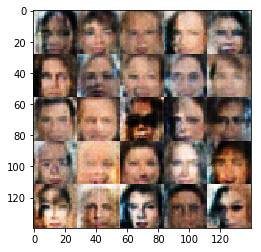

Epoch 1/1 Step 2010... Discriminator Loss: 1.5241... Generator Loss: 0.7975...
Epoch 1/1 Step 2020... Discriminator Loss: 1.4897... Generator Loss: 0.7536...
Epoch 1/1 Step 2030... Discriminator Loss: 1.4466... Generator Loss: 0.7592...
Epoch 1/1 Step 2040... Discriminator Loss: 1.5100... Generator Loss: 0.6770...
Epoch 1/1 Step 2050... Discriminator Loss: 1.5008... Generator Loss: 0.6911...
Epoch 1/1 Step 2060... Discriminator Loss: 1.5335... Generator Loss: 0.7111...
Epoch 1/1 Step 2070... Discriminator Loss: 1.4675... Generator Loss: 0.6829...
Epoch 1/1 Step 2080... Discriminator Loss: 1.4550... Generator Loss: 0.6569...
Epoch 1/1 Step 2090... Discriminator Loss: 1.4254... Generator Loss: 0.7289...
Epoch 1/1 Step 2100... Discriminator Loss: 1.4959... Generator Loss: 0.7173...


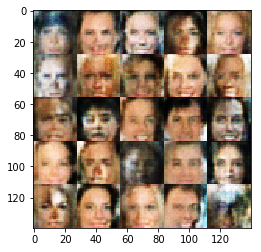

Epoch 1/1 Step 2110... Discriminator Loss: 1.4666... Generator Loss: 0.7055...
Epoch 1/1 Step 2120... Discriminator Loss: 1.4840... Generator Loss: 0.8488...
Epoch 1/1 Step 2130... Discriminator Loss: 1.4591... Generator Loss: 0.6848...
Epoch 1/1 Step 2140... Discriminator Loss: 1.4656... Generator Loss: 0.8178...
Epoch 1/1 Step 2150... Discriminator Loss: 1.4854... Generator Loss: 0.6292...
Epoch 1/1 Step 2160... Discriminator Loss: 1.5222... Generator Loss: 0.7209...
Epoch 1/1 Step 2170... Discriminator Loss: 1.4585... Generator Loss: 0.6492...
Epoch 1/1 Step 2180... Discriminator Loss: 1.5308... Generator Loss: 0.6304...
Epoch 1/1 Step 2190... Discriminator Loss: 1.5450... Generator Loss: 0.5853...
Epoch 1/1 Step 2200... Discriminator Loss: 1.4840... Generator Loss: 0.6085...


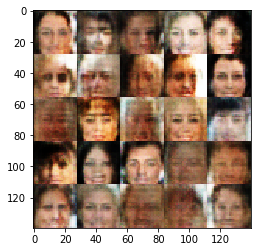

Epoch 1/1 Step 2210... Discriminator Loss: 1.5601... Generator Loss: 0.6730...
Epoch 1/1 Step 2220... Discriminator Loss: 1.4737... Generator Loss: 0.7513...
Epoch 1/1 Step 2230... Discriminator Loss: 1.5516... Generator Loss: 0.6623...
Epoch 1/1 Step 2240... Discriminator Loss: 1.5256... Generator Loss: 0.6831...
Epoch 1/1 Step 2250... Discriminator Loss: 1.5616... Generator Loss: 0.6657...
Epoch 1/1 Step 2260... Discriminator Loss: 1.6261... Generator Loss: 0.5716...
Epoch 1/1 Step 2270... Discriminator Loss: 1.4555... Generator Loss: 0.7622...
Epoch 1/1 Step 2280... Discriminator Loss: 1.4948... Generator Loss: 0.7247...
Epoch 1/1 Step 2290... Discriminator Loss: 1.4635... Generator Loss: 0.7587...
Epoch 1/1 Step 2300... Discriminator Loss: 1.4088... Generator Loss: 0.7740...


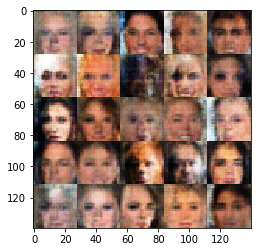

Epoch 1/1 Step 2310... Discriminator Loss: 1.4901... Generator Loss: 0.7571...
Epoch 1/1 Step 2320... Discriminator Loss: 1.4900... Generator Loss: 0.6575...
Epoch 1/1 Step 2330... Discriminator Loss: 1.4933... Generator Loss: 0.5973...
Epoch 1/1 Step 2340... Discriminator Loss: 1.6170... Generator Loss: 0.5831...
Epoch 1/1 Step 2350... Discriminator Loss: 1.4848... Generator Loss: 0.7531...
Epoch 1/1 Step 2360... Discriminator Loss: 1.5729... Generator Loss: 0.6839...
Epoch 1/1 Step 2370... Discriminator Loss: 1.5189... Generator Loss: 0.6201...
Epoch 1/1 Step 2380... Discriminator Loss: 1.4862... Generator Loss: 0.6521...
Epoch 1/1 Step 2390... Discriminator Loss: 1.4893... Generator Loss: 0.7032...
Epoch 1/1 Step 2400... Discriminator Loss: 1.4440... Generator Loss: 0.7016...


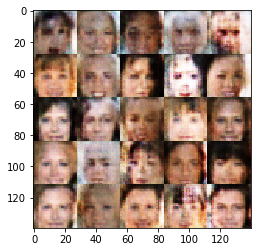

Epoch 1/1 Step 2410... Discriminator Loss: 1.5660... Generator Loss: 0.5582...
Epoch 1/1 Step 2420... Discriminator Loss: 1.4872... Generator Loss: 0.6490...
Epoch 1/1 Step 2430... Discriminator Loss: 1.4994... Generator Loss: 0.6906...
Epoch 1/1 Step 2440... Discriminator Loss: 1.4969... Generator Loss: 0.6849...
Epoch 1/1 Step 2450... Discriminator Loss: 1.5604... Generator Loss: 0.5903...
Epoch 1/1 Step 2460... Discriminator Loss: 1.4671... Generator Loss: 0.6444...
Epoch 1/1 Step 2470... Discriminator Loss: 1.4918... Generator Loss: 0.7082...
Epoch 1/1 Step 2480... Discriminator Loss: 1.5273... Generator Loss: 0.6708...
Epoch 1/1 Step 2490... Discriminator Loss: 1.5262... Generator Loss: 0.6251...
Epoch 1/1 Step 2500... Discriminator Loss: 1.4841... Generator Loss: 0.7820...


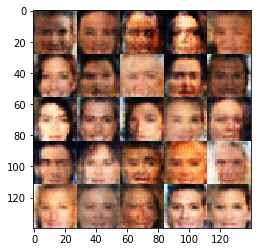

Epoch 1/1 Step 2510... Discriminator Loss: 1.4854... Generator Loss: 0.6752...
Epoch 1/1 Step 2520... Discriminator Loss: 1.4644... Generator Loss: 0.8228...
Epoch 1/1 Step 2530... Discriminator Loss: 1.5056... Generator Loss: 0.6380...
Epoch 1/1 Step 2540... Discriminator Loss: 1.4713... Generator Loss: 0.7320...
Epoch 1/1 Step 2550... Discriminator Loss: 1.4234... Generator Loss: 0.7091...
Epoch 1/1 Step 2560... Discriminator Loss: 1.4970... Generator Loss: 0.6394...
Epoch 1/1 Step 2570... Discriminator Loss: 1.5301... Generator Loss: 0.6798...
Epoch 1/1 Step 2580... Discriminator Loss: 1.5170... Generator Loss: 0.6203...
Epoch 1/1 Step 2590... Discriminator Loss: 1.4732... Generator Loss: 0.6918...
Epoch 1/1 Step 2600... Discriminator Loss: 1.4821... Generator Loss: 0.6468...


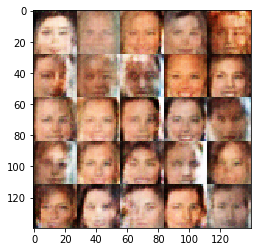

Epoch 1/1 Step 2610... Discriminator Loss: 1.5296... Generator Loss: 0.6825...
Epoch 1/1 Step 2620... Discriminator Loss: 1.4831... Generator Loss: 0.8178...
Epoch 1/1 Step 2630... Discriminator Loss: 1.4768... Generator Loss: 0.6748...
Epoch 1/1 Step 2640... Discriminator Loss: 1.4425... Generator Loss: 0.8088...
Epoch 1/1 Step 2650... Discriminator Loss: 1.4196... Generator Loss: 0.7305...
Epoch 1/1 Step 2660... Discriminator Loss: 1.4848... Generator Loss: 0.6942...
Epoch 1/1 Step 2670... Discriminator Loss: 1.4247... Generator Loss: 0.7797...
Epoch 1/1 Step 2680... Discriminator Loss: 1.4643... Generator Loss: 0.7416...
Epoch 1/1 Step 2690... Discriminator Loss: 1.4743... Generator Loss: 0.7671...
Epoch 1/1 Step 2700... Discriminator Loss: 1.4688... Generator Loss: 0.7210...


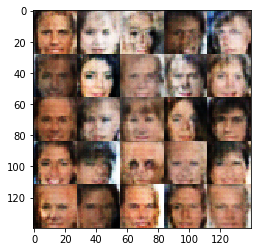

Epoch 1/1 Step 2710... Discriminator Loss: 1.4665... Generator Loss: 0.7362...
Epoch 1/1 Step 2720... Discriminator Loss: 1.4887... Generator Loss: 0.6665...
Epoch 1/1 Step 2730... Discriminator Loss: 1.5251... Generator Loss: 0.7587...
Epoch 1/1 Step 2740... Discriminator Loss: 1.5181... Generator Loss: 0.6841...
Epoch 1/1 Step 2750... Discriminator Loss: 1.4569... Generator Loss: 0.8010...
Epoch 1/1 Step 2760... Discriminator Loss: 1.4789... Generator Loss: 0.6988...
Epoch 1/1 Step 2770... Discriminator Loss: 1.4833... Generator Loss: 0.7387...
Epoch 1/1 Step 2780... Discriminator Loss: 1.4459... Generator Loss: 0.6627...
Epoch 1/1 Step 2790... Discriminator Loss: 1.4807... Generator Loss: 0.8672...
Epoch 1/1 Step 2800... Discriminator Loss: 1.5031... Generator Loss: 0.7078...


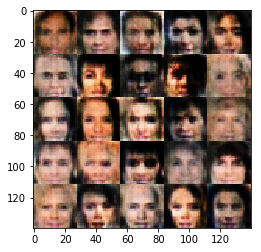

Epoch 1/1 Step 2810... Discriminator Loss: 1.4636... Generator Loss: 0.6775...
Epoch 1/1 Step 2820... Discriminator Loss: 1.4899... Generator Loss: 0.6959...
Epoch 1/1 Step 2830... Discriminator Loss: 1.4823... Generator Loss: 0.6441...
Epoch 1/1 Step 2840... Discriminator Loss: 1.4523... Generator Loss: 0.7014...
Epoch 1/1 Step 2850... Discriminator Loss: 1.4745... Generator Loss: 0.6654...
Epoch 1/1 Step 2860... Discriminator Loss: 1.5272... Generator Loss: 0.6432...
Epoch 1/1 Step 2870... Discriminator Loss: 1.4939... Generator Loss: 0.6300...
Epoch 1/1 Step 2880... Discriminator Loss: 1.3886... Generator Loss: 0.7816...
Epoch 1/1 Step 2890... Discriminator Loss: 1.4528... Generator Loss: 0.7060...
Epoch 1/1 Step 2900... Discriminator Loss: 1.4924... Generator Loss: 0.6544...


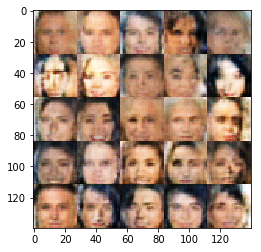

Epoch 1/1 Step 2910... Discriminator Loss: 1.4785... Generator Loss: 0.6885...
Epoch 1/1 Step 2920... Discriminator Loss: 1.4946... Generator Loss: 0.7599...
Epoch 1/1 Step 2930... Discriminator Loss: 1.5029... Generator Loss: 0.6807...
Epoch 1/1 Step 2940... Discriminator Loss: 1.4636... Generator Loss: 0.7266...
Epoch 1/1 Step 2950... Discriminator Loss: 1.4747... Generator Loss: 0.7236...
Epoch 1/1 Step 2960... Discriminator Loss: 1.5166... Generator Loss: 0.5914...
Epoch 1/1 Step 2970... Discriminator Loss: 1.5707... Generator Loss: 0.5912...
Epoch 1/1 Step 2980... Discriminator Loss: 1.4867... Generator Loss: 0.7883...
Epoch 1/1 Step 2990... Discriminator Loss: 1.4373... Generator Loss: 0.7569...
Epoch 1/1 Step 3000... Discriminator Loss: 1.4931... Generator Loss: 0.6642...


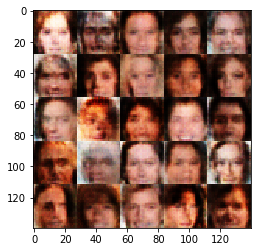

Epoch 1/1 Step 3010... Discriminator Loss: 1.5801... Generator Loss: 0.6145...
Epoch 1/1 Step 3020... Discriminator Loss: 1.4750... Generator Loss: 0.6023...
Epoch 1/1 Step 3030... Discriminator Loss: 1.4652... Generator Loss: 0.7171...
Epoch 1/1 Step 3040... Discriminator Loss: 1.4745... Generator Loss: 0.6356...
Epoch 1/1 Step 3050... Discriminator Loss: 1.4740... Generator Loss: 0.7145...
Epoch 1/1 Step 3060... Discriminator Loss: 1.4328... Generator Loss: 0.7403...
Epoch 1/1 Step 3070... Discriminator Loss: 1.4830... Generator Loss: 0.6809...
Epoch 1/1 Step 3080... Discriminator Loss: 1.4432... Generator Loss: 0.7232...
Epoch 1/1 Step 3090... Discriminator Loss: 1.4897... Generator Loss: 0.8192...
Epoch 1/1 Step 3100... Discriminator Loss: 1.5101... Generator Loss: 0.6279...


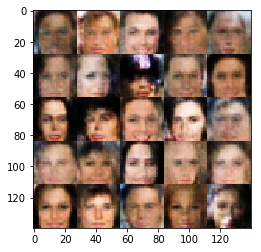

Epoch 1/1 Step 3110... Discriminator Loss: 1.4431... Generator Loss: 0.7435...
Epoch 1/1 Step 3120... Discriminator Loss: 1.4518... Generator Loss: 0.7252...
Epoch 1/1 Step 3130... Discriminator Loss: 1.5487... Generator Loss: 0.7246...
Epoch 1/1 Step 3140... Discriminator Loss: 1.5628... Generator Loss: 0.7418...
Epoch 1/1 Step 3150... Discriminator Loss: 1.4809... Generator Loss: 0.6869...
Epoch 1/1 Step 3160... Discriminator Loss: 1.4605... Generator Loss: 0.6901...
Epoch 1/1 Step 3170... Discriminator Loss: 1.4922... Generator Loss: 0.7340...
Epoch 1/1 Step 3180... Discriminator Loss: 1.5057... Generator Loss: 0.7215...
Epoch 1/1 Step 3190... Discriminator Loss: 1.4108... Generator Loss: 0.7470...
Epoch 1/1 Step 3200... Discriminator Loss: 1.4866... Generator Loss: 0.6944...


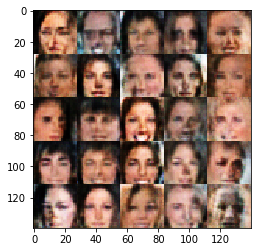

Epoch 1/1 Step 3210... Discriminator Loss: 1.5441... Generator Loss: 0.6732...
Epoch 1/1 Step 3220... Discriminator Loss: 1.4975... Generator Loss: 0.6501...
Epoch 1/1 Step 3230... Discriminator Loss: 1.4998... Generator Loss: 0.6272...
Epoch 1/1 Step 3240... Discriminator Loss: 1.5175... Generator Loss: 0.6494...
Epoch 1/1 Step 3250... Discriminator Loss: 1.4429... Generator Loss: 0.7248...
Epoch 1/1 Step 3260... Discriminator Loss: 1.4462... Generator Loss: 0.7482...
Epoch 1/1 Step 3270... Discriminator Loss: 1.4498... Generator Loss: 0.6551...
Epoch 1/1 Step 3280... Discriminator Loss: 1.4640... Generator Loss: 0.7046...
Epoch 1/1 Step 3290... Discriminator Loss: 1.4540... Generator Loss: 0.6672...
Epoch 1/1 Step 3300... Discriminator Loss: 1.4958... Generator Loss: 0.5889...


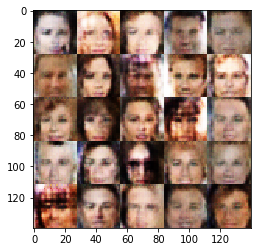

Epoch 1/1 Step 3310... Discriminator Loss: 1.4643... Generator Loss: 0.6914...
Epoch 1/1 Step 3320... Discriminator Loss: 1.4646... Generator Loss: 0.7082...
Epoch 1/1 Step 3330... Discriminator Loss: 1.4605... Generator Loss: 0.6563...
Epoch 1/1 Step 3340... Discriminator Loss: 1.4428... Generator Loss: 0.6942...
Epoch 1/1 Step 3350... Discriminator Loss: 1.4602... Generator Loss: 0.7579...
Epoch 1/1 Step 3360... Discriminator Loss: 1.4845... Generator Loss: 0.8081...
Epoch 1/1 Step 3370... Discriminator Loss: 1.4933... Generator Loss: 0.7148...
Epoch 1/1 Step 3380... Discriminator Loss: 1.4650... Generator Loss: 0.6905...
Epoch 1/1 Step 3390... Discriminator Loss: 1.4950... Generator Loss: 0.6437...
Epoch 1/1 Step 3400... Discriminator Loss: 1.4362... Generator Loss: 0.6858...


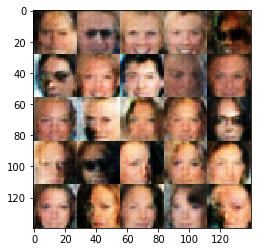

Epoch 1/1 Step 3410... Discriminator Loss: 1.4787... Generator Loss: 0.6801...
Epoch 1/1 Step 3420... Discriminator Loss: 1.4653... Generator Loss: 0.7308...
Epoch 1/1 Step 3430... Discriminator Loss: 1.4625... Generator Loss: 0.7203...
Epoch 1/1 Step 3440... Discriminator Loss: 1.4525... Generator Loss: 0.7215...
Epoch 1/1 Step 3450... Discriminator Loss: 1.4901... Generator Loss: 0.7753...
Epoch 1/1 Step 3460... Discriminator Loss: 1.5077... Generator Loss: 0.6464...
Epoch 1/1 Step 3470... Discriminator Loss: 1.4557... Generator Loss: 0.7432...
Epoch 1/1 Step 3480... Discriminator Loss: 1.4506... Generator Loss: 0.8149...
Epoch 1/1 Step 3490... Discriminator Loss: 1.4522... Generator Loss: 0.7656...
Epoch 1/1 Step 3500... Discriminator Loss: 1.5537... Generator Loss: 0.6193...


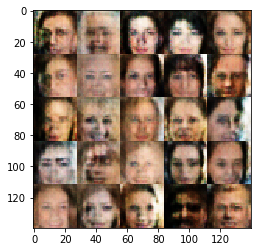

Epoch 1/1 Step 3510... Discriminator Loss: 1.4788... Generator Loss: 0.6964...
Epoch 1/1 Step 3520... Discriminator Loss: 1.4699... Generator Loss: 0.6565...
Epoch 1/1 Step 3530... Discriminator Loss: 1.4537... Generator Loss: 0.7089...
Epoch 1/1 Step 3540... Discriminator Loss: 1.4478... Generator Loss: 0.6809...
Epoch 1/1 Step 3550... Discriminator Loss: 1.4296... Generator Loss: 0.8049...
Epoch 1/1 Step 3560... Discriminator Loss: 1.4603... Generator Loss: 0.6922...
Epoch 1/1 Step 3570... Discriminator Loss: 1.4577... Generator Loss: 0.6581...
Epoch 1/1 Step 3580... Discriminator Loss: 1.4608... Generator Loss: 0.7907...
Epoch 1/1 Step 3590... Discriminator Loss: 1.4585... Generator Loss: 0.8005...
Epoch 1/1 Step 3600... Discriminator Loss: 1.4788... Generator Loss: 0.6526...


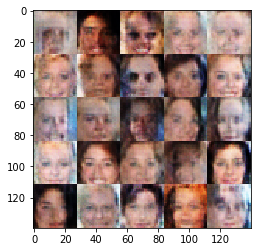

Epoch 1/1 Step 3610... Discriminator Loss: 1.4644... Generator Loss: 0.7030...
Epoch 1/1 Step 3620... Discriminator Loss: 1.4525... Generator Loss: 0.7890...
Epoch 1/1 Step 3630... Discriminator Loss: 1.4564... Generator Loss: 0.7301...
Epoch 1/1 Step 3640... Discriminator Loss: 1.4649... Generator Loss: 0.8070...
Epoch 1/1 Step 3650... Discriminator Loss: 1.4567... Generator Loss: 0.6167...
Epoch 1/1 Step 3660... Discriminator Loss: 1.5641... Generator Loss: 0.5385...
Epoch 1/1 Step 3670... Discriminator Loss: 1.4662... Generator Loss: 0.6507...
Epoch 1/1 Step 3680... Discriminator Loss: 1.5071... Generator Loss: 0.6522...
Epoch 1/1 Step 3690... Discriminator Loss: 1.5034... Generator Loss: 0.6632...
Epoch 1/1 Step 3700... Discriminator Loss: 1.4882... Generator Loss: 0.6306...


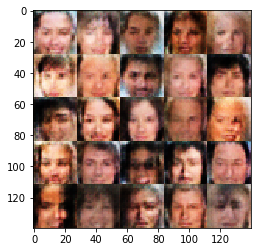

Epoch 1/1 Step 3710... Discriminator Loss: 1.4902... Generator Loss: 0.6414...
Epoch 1/1 Step 3720... Discriminator Loss: 1.4184... Generator Loss: 0.7629...
Epoch 1/1 Step 3730... Discriminator Loss: 1.4484... Generator Loss: 0.6400...
Epoch 1/1 Step 3740... Discriminator Loss: 1.4166... Generator Loss: 0.6883...
Epoch 1/1 Step 3750... Discriminator Loss: 1.4691... Generator Loss: 0.7215...
Epoch 1/1 Step 3760... Discriminator Loss: 1.4218... Generator Loss: 0.7256...
Epoch 1/1 Step 3770... Discriminator Loss: 1.4564... Generator Loss: 0.7450...
Epoch 1/1 Step 3780... Discriminator Loss: 1.4513... Generator Loss: 0.7638...
Epoch 1/1 Step 3790... Discriminator Loss: 1.4573... Generator Loss: 0.7160...
Epoch 1/1 Step 3800... Discriminator Loss: 1.4755... Generator Loss: 0.6411...


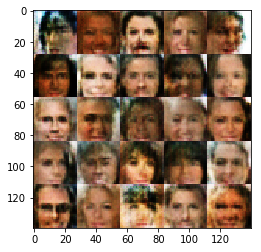

Epoch 1/1 Step 3810... Discriminator Loss: 1.4305... Generator Loss: 0.6471...
Epoch 1/1 Step 3820... Discriminator Loss: 1.5374... Generator Loss: 0.6371...
Epoch 1/1 Step 3830... Discriminator Loss: 1.4458... Generator Loss: 0.8292...
Epoch 1/1 Step 3840... Discriminator Loss: 1.4210... Generator Loss: 0.7102...
Epoch 1/1 Step 3850... Discriminator Loss: 1.5061... Generator Loss: 0.5729...
Epoch 1/1 Step 3860... Discriminator Loss: 1.5058... Generator Loss: 0.6499...
Epoch 1/1 Step 3870... Discriminator Loss: 1.4632... Generator Loss: 0.8064...
Epoch 1/1 Step 3880... Discriminator Loss: 1.5143... Generator Loss: 0.5887...
Epoch 1/1 Step 3890... Discriminator Loss: 1.4846... Generator Loss: 0.6639...
Epoch 1/1 Step 3900... Discriminator Loss: 1.4705... Generator Loss: 0.6733...


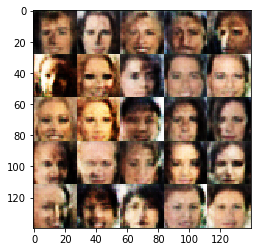

Epoch 1/1 Step 3910... Discriminator Loss: 1.4609... Generator Loss: 0.6024...
Epoch 1/1 Step 3920... Discriminator Loss: 1.4563... Generator Loss: 0.6908...
Epoch 1/1 Step 3930... Discriminator Loss: 1.4782... Generator Loss: 0.6299...
Epoch 1/1 Step 3940... Discriminator Loss: 1.4429... Generator Loss: 0.6948...
Epoch 1/1 Step 3950... Discriminator Loss: 1.4553... Generator Loss: 0.7056...
Epoch 1/1 Step 3960... Discriminator Loss: 1.4675... Generator Loss: 0.6878...
Epoch 1/1 Step 3970... Discriminator Loss: 1.4371... Generator Loss: 0.7248...
Epoch 1/1 Step 3980... Discriminator Loss: 1.4684... Generator Loss: 0.7019...
Epoch 1/1 Step 3990... Discriminator Loss: 1.4352... Generator Loss: 0.6968...
Epoch 1/1 Step 4000... Discriminator Loss: 1.4846... Generator Loss: 0.9155...


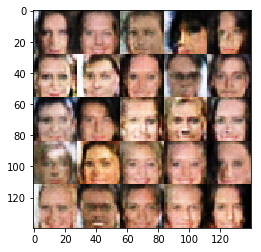

Epoch 1/1 Step 4010... Discriminator Loss: 1.4388... Generator Loss: 0.8060...
Epoch 1/1 Step 4020... Discriminator Loss: 1.5154... Generator Loss: 0.6164...
Epoch 1/1 Step 4030... Discriminator Loss: 1.4500... Generator Loss: 0.6936...
Epoch 1/1 Step 4040... Discriminator Loss: 1.4749... Generator Loss: 0.6382...
Epoch 1/1 Step 4050... Discriminator Loss: 1.4510... Generator Loss: 0.6806...
Epoch 1/1 Step 4060... Discriminator Loss: 1.4557... Generator Loss: 0.7362...
Epoch 1/1 Step 4070... Discriminator Loss: 1.5219... Generator Loss: 0.6250...
Epoch 1/1 Step 4080... Discriminator Loss: 1.4265... Generator Loss: 0.7220...
Epoch 1/1 Step 4090... Discriminator Loss: 1.4351... Generator Loss: 0.7397...
Epoch 1/1 Step 4100... Discriminator Loss: 1.4156... Generator Loss: 0.7449...


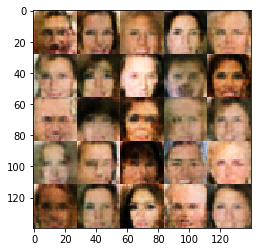

Epoch 1/1 Step 4110... Discriminator Loss: 1.4837... Generator Loss: 0.7750...
Epoch 1/1 Step 4120... Discriminator Loss: 1.4608... Generator Loss: 0.6899...
Epoch 1/1 Step 4130... Discriminator Loss: 1.4543... Generator Loss: 0.7243...
Epoch 1/1 Step 4140... Discriminator Loss: 1.5001... Generator Loss: 0.8080...
Epoch 1/1 Step 4150... Discriminator Loss: 1.4417... Generator Loss: 0.6868...
Epoch 1/1 Step 4160... Discriminator Loss: 1.4388... Generator Loss: 0.7881...
Epoch 1/1 Step 4170... Discriminator Loss: 1.5040... Generator Loss: 0.7584...
Epoch 1/1 Step 4180... Discriminator Loss: 1.4344... Generator Loss: 0.6811...
Epoch 1/1 Step 4190... Discriminator Loss: 1.4517... Generator Loss: 0.6846...
Epoch 1/1 Step 4200... Discriminator Loss: 1.4974... Generator Loss: 0.6871...


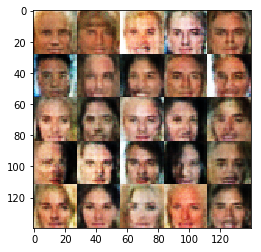

Epoch 1/1 Step 4210... Discriminator Loss: 1.4154... Generator Loss: 0.7496...
Epoch 1/1 Step 4220... Discriminator Loss: 1.4680... Generator Loss: 0.6255...
Epoch 1/1 Step 4230... Discriminator Loss: 1.4613... Generator Loss: 0.8097...
Epoch 1/1 Step 4240... Discriminator Loss: 1.4477... Generator Loss: 0.7892...
Epoch 1/1 Step 4250... Discriminator Loss: 1.4306... Generator Loss: 0.7125...
Epoch 1/1 Step 4260... Discriminator Loss: 1.4440... Generator Loss: 0.6866...
Epoch 1/1 Step 4270... Discriminator Loss: 1.4346... Generator Loss: 0.7954...
Epoch 1/1 Step 4280... Discriminator Loss: 1.4283... Generator Loss: 0.7561...
Epoch 1/1 Step 4290... Discriminator Loss: 1.4687... Generator Loss: 0.7156...
Epoch 1/1 Step 4300... Discriminator Loss: 1.4496... Generator Loss: 0.6895...


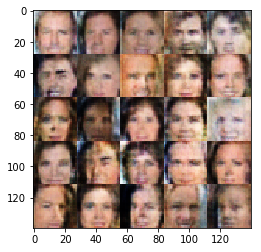

Epoch 1/1 Step 4310... Discriminator Loss: 1.4382... Generator Loss: 0.6556...
Epoch 1/1 Step 4320... Discriminator Loss: 1.4828... Generator Loss: 0.6762...
Epoch 1/1 Step 4330... Discriminator Loss: 1.5167... Generator Loss: 0.7119...
Epoch 1/1 Step 4340... Discriminator Loss: 1.4148... Generator Loss: 0.7184...
Epoch 1/1 Step 4350... Discriminator Loss: 1.5059... Generator Loss: 0.6754...
Epoch 1/1 Step 4360... Discriminator Loss: 1.4123... Generator Loss: 0.7554...
Epoch 1/1 Step 4370... Discriminator Loss: 1.4638... Generator Loss: 0.6050...
Epoch 1/1 Step 4380... Discriminator Loss: 1.4904... Generator Loss: 0.6710...
Epoch 1/1 Step 4390... Discriminator Loss: 1.5497... Generator Loss: 0.5929...
Epoch 1/1 Step 4400... Discriminator Loss: 1.5885... Generator Loss: 0.6491...


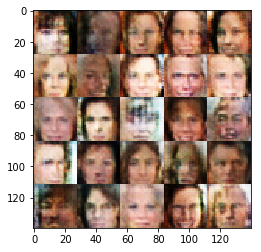

Epoch 1/1 Step 4410... Discriminator Loss: 1.4618... Generator Loss: 0.6631...
Epoch 1/1 Step 4420... Discriminator Loss: 1.4607... Generator Loss: 0.6925...
Epoch 1/1 Step 4430... Discriminator Loss: 1.4649... Generator Loss: 0.6535...
Epoch 1/1 Step 4440... Discriminator Loss: 1.4381... Generator Loss: 0.8385...
Epoch 1/1 Step 4450... Discriminator Loss: 1.4168... Generator Loss: 0.7613...
Epoch 1/1 Step 4460... Discriminator Loss: 1.4222... Generator Loss: 0.6590...
Epoch 1/1 Step 4470... Discriminator Loss: 1.4560... Generator Loss: 0.6562...
Epoch 1/1 Step 4480... Discriminator Loss: 1.4853... Generator Loss: 0.6695...
Epoch 1/1 Step 4490... Discriminator Loss: 1.4488... Generator Loss: 0.6565...
Epoch 1/1 Step 4500... Discriminator Loss: 1.4572... Generator Loss: 0.6914...


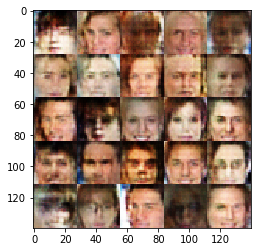

Epoch 1/1 Step 4510... Discriminator Loss: 1.4187... Generator Loss: 0.8171...
Epoch 1/1 Step 4520... Discriminator Loss: 1.4949... Generator Loss: 0.7418...
Epoch 1/1 Step 4530... Discriminator Loss: 1.4383... Generator Loss: 0.7456...
Epoch 1/1 Step 4540... Discriminator Loss: 1.4619... Generator Loss: 0.6177...
Epoch 1/1 Step 4550... Discriminator Loss: 1.4970... Generator Loss: 0.6355...
Epoch 1/1 Step 4560... Discriminator Loss: 1.4247... Generator Loss: 0.7187...
Epoch 1/1 Step 4570... Discriminator Loss: 1.4685... Generator Loss: 0.6430...
Epoch 1/1 Step 4580... Discriminator Loss: 1.4570... Generator Loss: 0.6305...
Epoch 1/1 Step 4590... Discriminator Loss: 1.4077... Generator Loss: 0.7877...
Epoch 1/1 Step 4600... Discriminator Loss: 1.4821... Generator Loss: 0.6220...


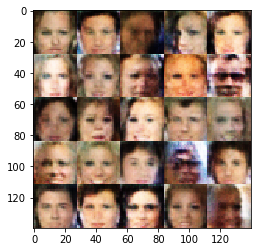

Epoch 1/1 Step 4610... Discriminator Loss: 1.4428... Generator Loss: 0.7148...
Epoch 1/1 Step 4620... Discriminator Loss: 1.4372... Generator Loss: 0.7541...
Epoch 1/1 Step 4630... Discriminator Loss: 1.4018... Generator Loss: 0.8412...
Epoch 1/1 Step 4640... Discriminator Loss: 1.4290... Generator Loss: 0.6751...
Epoch 1/1 Step 4650... Discriminator Loss: 1.4410... Generator Loss: 0.7568...
Epoch 1/1 Step 4660... Discriminator Loss: 1.4602... Generator Loss: 0.7556...
Epoch 1/1 Step 4670... Discriminator Loss: 1.4322... Generator Loss: 0.7483...
Epoch 1/1 Step 4680... Discriminator Loss: 1.4598... Generator Loss: 0.6769...
Epoch 1/1 Step 4690... Discriminator Loss: 1.4763... Generator Loss: 0.6874...
Epoch 1/1 Step 4700... Discriminator Loss: 1.4693... Generator Loss: 0.7759...


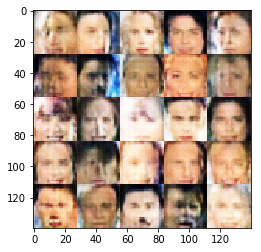

Epoch 1/1 Step 4710... Discriminator Loss: 1.5046... Generator Loss: 0.5857...
Epoch 1/1 Step 4720... Discriminator Loss: 1.4780... Generator Loss: 0.5999...
Epoch 1/1 Step 4730... Discriminator Loss: 1.4640... Generator Loss: 0.6910...
Epoch 1/1 Step 4740... Discriminator Loss: 1.4333... Generator Loss: 0.7852...
Epoch 1/1 Step 4750... Discriminator Loss: 1.4277... Generator Loss: 0.6643...
Epoch 1/1 Step 4760... Discriminator Loss: 1.4186... Generator Loss: 0.6910...
Epoch 1/1 Step 4770... Discriminator Loss: 1.4358... Generator Loss: 0.6859...
Epoch 1/1 Step 4780... Discriminator Loss: 1.4748... Generator Loss: 0.6543...
Epoch 1/1 Step 4790... Discriminator Loss: 1.4274... Generator Loss: 0.8100...
Epoch 1/1 Step 4800... Discriminator Loss: 1.4378... Generator Loss: 0.7092...


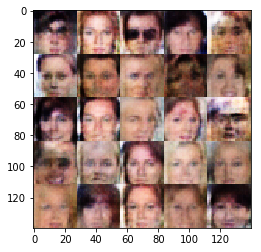

Epoch 1/1 Step 4810... Discriminator Loss: 1.4616... Generator Loss: 0.6887...
Epoch 1/1 Step 4820... Discriminator Loss: 1.4262... Generator Loss: 0.6534...
Epoch 1/1 Step 4830... Discriminator Loss: 1.4617... Generator Loss: 0.6205...
Epoch 1/1 Step 4840... Discriminator Loss: 1.4254... Generator Loss: 0.7614...
Epoch 1/1 Step 4850... Discriminator Loss: 1.4577... Generator Loss: 0.7527...
Epoch 1/1 Step 4860... Discriminator Loss: 1.4276... Generator Loss: 0.6752...
Epoch 1/1 Step 4870... Discriminator Loss: 1.4512... Generator Loss: 0.7383...
Epoch 1/1 Step 4880... Discriminator Loss: 1.5082... Generator Loss: 0.7095...
Epoch 1/1 Step 4890... Discriminator Loss: 1.4899... Generator Loss: 0.7476...
Epoch 1/1 Step 4900... Discriminator Loss: 1.4349... Generator Loss: 0.6674...


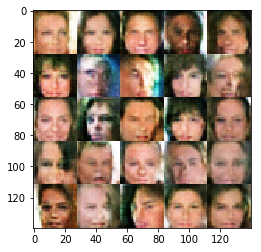

Epoch 1/1 Step 4910... Discriminator Loss: 1.4724... Generator Loss: 0.5902...
Epoch 1/1 Step 4920... Discriminator Loss: 1.4853... Generator Loss: 0.7856...
Epoch 1/1 Step 4930... Discriminator Loss: 1.4393... Generator Loss: 0.7511...
Epoch 1/1 Step 4940... Discriminator Loss: 1.4770... Generator Loss: 0.7695...
Epoch 1/1 Step 4950... Discriminator Loss: 1.5039... Generator Loss: 0.6997...
Epoch 1/1 Step 4960... Discriminator Loss: 1.4263... Generator Loss: 0.8306...
Epoch 1/1 Step 4970... Discriminator Loss: 1.4584... Generator Loss: 0.7027...
Epoch 1/1 Step 4980... Discriminator Loss: 1.4755... Generator Loss: 0.6550...
Epoch 1/1 Step 4990... Discriminator Loss: 1.4245... Generator Loss: 0.7549...
Epoch 1/1 Step 5000... Discriminator Loss: 1.4542... Generator Loss: 0.6871...


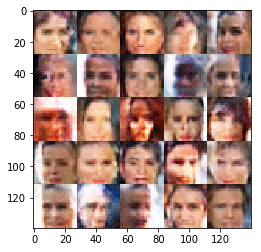

Epoch 1/1 Step 5010... Discriminator Loss: 1.5067... Generator Loss: 0.6190...
Epoch 1/1 Step 5020... Discriminator Loss: 1.4662... Generator Loss: 0.6742...
Epoch 1/1 Step 5030... Discriminator Loss: 1.4686... Generator Loss: 0.6891...
Epoch 1/1 Step 5040... Discriminator Loss: 1.4827... Generator Loss: 0.7243...
Epoch 1/1 Step 5050... Discriminator Loss: 1.4472... Generator Loss: 0.7401...
Epoch 1/1 Step 5060... Discriminator Loss: 1.4255... Generator Loss: 0.7229...
Epoch 1/1 Step 5070... Discriminator Loss: 1.5209... Generator Loss: 0.7306...
Epoch 1/1 Step 5080... Discriminator Loss: 1.5014... Generator Loss: 0.5644...
Epoch 1/1 Step 5090... Discriminator Loss: 1.4251... Generator Loss: 0.7816...
Epoch 1/1 Step 5100... Discriminator Loss: 1.4331... Generator Loss: 0.7065...


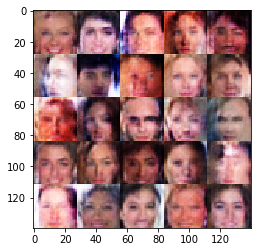

Epoch 1/1 Step 5110... Discriminator Loss: 1.4037... Generator Loss: 0.7593...
Epoch 1/1 Step 5120... Discriminator Loss: 1.4295... Generator Loss: 0.7573...
Epoch 1/1 Step 5130... Discriminator Loss: 1.4791... Generator Loss: 0.7239...
Epoch 1/1 Step 5140... Discriminator Loss: 1.4315... Generator Loss: 0.6675...
Epoch 1/1 Step 5150... Discriminator Loss: 1.4487... Generator Loss: 0.8065...
Epoch 1/1 Step 5160... Discriminator Loss: 1.4483... Generator Loss: 0.6943...
Epoch 1/1 Step 5170... Discriminator Loss: 1.4451... Generator Loss: 0.7600...
Epoch 1/1 Step 5180... Discriminator Loss: 1.4158... Generator Loss: 0.7625...
Epoch 1/1 Step 5190... Discriminator Loss: 1.4281... Generator Loss: 0.8350...
Epoch 1/1 Step 5200... Discriminator Loss: 1.4552... Generator Loss: 0.6754...


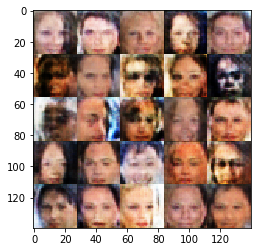

Epoch 1/1 Step 5210... Discriminator Loss: 1.5169... Generator Loss: 0.6647...
Epoch 1/1 Step 5220... Discriminator Loss: 1.4628... Generator Loss: 0.7339...
Epoch 1/1 Step 5230... Discriminator Loss: 1.4091... Generator Loss: 0.8192...
Epoch 1/1 Step 5240... Discriminator Loss: 1.4416... Generator Loss: 0.8410...
Epoch 1/1 Step 5250... Discriminator Loss: 1.4701... Generator Loss: 0.6329...
Epoch 1/1 Step 5260... Discriminator Loss: 1.4594... Generator Loss: 0.6028...
Epoch 1/1 Step 5270... Discriminator Loss: 1.4466... Generator Loss: 0.6921...
Epoch 1/1 Step 5280... Discriminator Loss: 1.4540... Generator Loss: 0.6639...
Epoch 1/1 Step 5290... Discriminator Loss: 1.5102... Generator Loss: 0.6708...
Epoch 1/1 Step 5300... Discriminator Loss: 1.4711... Generator Loss: 0.6804...


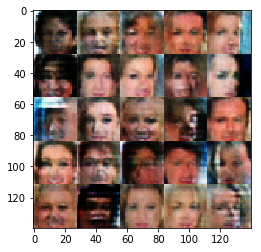

Epoch 1/1 Step 5310... Discriminator Loss: 1.4603... Generator Loss: 0.5835...
Epoch 1/1 Step 5320... Discriminator Loss: 1.3877... Generator Loss: 0.8113...
Epoch 1/1 Step 5330... Discriminator Loss: 1.4534... Generator Loss: 0.7013...
Epoch 1/1 Step 5340... Discriminator Loss: 1.4045... Generator Loss: 0.8872...
Epoch 1/1 Step 5350... Discriminator Loss: 1.4903... Generator Loss: 0.5999...
Epoch 1/1 Step 5360... Discriminator Loss: 1.4592... Generator Loss: 0.6641...
Epoch 1/1 Step 5370... Discriminator Loss: 1.4436... Generator Loss: 0.7910...
Epoch 1/1 Step 5380... Discriminator Loss: 1.4884... Generator Loss: 0.6814...
Epoch 1/1 Step 5390... Discriminator Loss: 1.4381... Generator Loss: 0.7976...
Epoch 1/1 Step 5400... Discriminator Loss: 1.4555... Generator Loss: 0.7452...


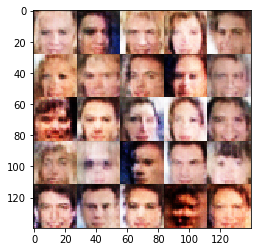

Epoch 1/1 Step 5410... Discriminator Loss: 1.4133... Generator Loss: 0.7442...
Epoch 1/1 Step 5420... Discriminator Loss: 1.4644... Generator Loss: 0.7979...
Epoch 1/1 Step 5430... Discriminator Loss: 1.4521... Generator Loss: 0.6406...
Epoch 1/1 Step 5440... Discriminator Loss: 1.4651... Generator Loss: 0.7776...
Epoch 1/1 Step 5450... Discriminator Loss: 1.4426... Generator Loss: 0.7336...
Epoch 1/1 Step 5460... Discriminator Loss: 1.4559... Generator Loss: 0.8655...
Epoch 1/1 Step 5470... Discriminator Loss: 1.4068... Generator Loss: 0.7627...
Epoch 1/1 Step 5480... Discriminator Loss: 1.4858... Generator Loss: 0.6470...
Epoch 1/1 Step 5490... Discriminator Loss: 1.4826... Generator Loss: 0.7302...
Epoch 1/1 Step 5500... Discriminator Loss: 1.4451... Generator Loss: 0.6602...


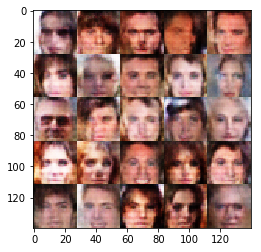

Epoch 1/1 Step 5510... Discriminator Loss: 1.4576... Generator Loss: 0.6352...
Epoch 1/1 Step 5520... Discriminator Loss: 1.4456... Generator Loss: 0.7421...
Epoch 1/1 Step 5530... Discriminator Loss: 1.4648... Generator Loss: 0.6202...
Epoch 1/1 Step 5540... Discriminator Loss: 1.4448... Generator Loss: 0.7059...
Epoch 1/1 Step 5550... Discriminator Loss: 1.4838... Generator Loss: 0.5882...
Epoch 1/1 Step 5560... Discriminator Loss: 1.4609... Generator Loss: 0.6780...
Epoch 1/1 Step 5570... Discriminator Loss: 1.4555... Generator Loss: 0.6609...
Epoch 1/1 Step 5580... Discriminator Loss: 1.4525... Generator Loss: 0.7829...
Epoch 1/1 Step 5590... Discriminator Loss: 1.4691... Generator Loss: 0.6880...
Epoch 1/1 Step 5600... Discriminator Loss: 1.4678... Generator Loss: 0.6356...


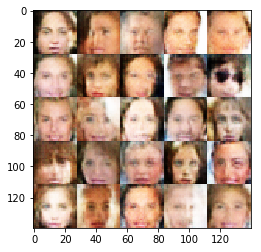

Epoch 1/1 Step 5610... Discriminator Loss: 1.4233... Generator Loss: 0.7057...
Epoch 1/1 Step 5620... Discriminator Loss: 1.5104... Generator Loss: 0.6138...
Epoch 1/1 Step 5630... Discriminator Loss: 1.4162... Generator Loss: 0.8148...
Epoch 1/1 Step 5640... Discriminator Loss: 1.4592... Generator Loss: 0.6588...
Epoch 1/1 Step 5650... Discriminator Loss: 1.4538... Generator Loss: 0.6497...
Epoch 1/1 Step 5660... Discriminator Loss: 1.4513... Generator Loss: 0.8421...
Epoch 1/1 Step 5670... Discriminator Loss: 1.3847... Generator Loss: 0.7966...
Epoch 1/1 Step 5680... Discriminator Loss: 1.4572... Generator Loss: 0.6941...
Epoch 1/1 Step 5690... Discriminator Loss: 1.3993... Generator Loss: 0.7773...
Epoch 1/1 Step 5700... Discriminator Loss: 1.4628... Generator Loss: 0.7438...


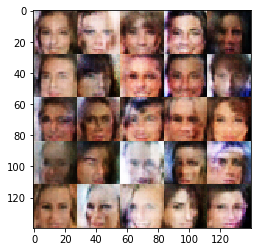

Epoch 1/1 Step 5710... Discriminator Loss: 1.4594... Generator Loss: 0.9042...
Epoch 1/1 Step 5720... Discriminator Loss: 1.4700... Generator Loss: 0.6109...
Epoch 1/1 Step 5730... Discriminator Loss: 1.4910... Generator Loss: 0.6979...
Epoch 1/1 Step 5740... Discriminator Loss: 1.4547... Generator Loss: 0.6653...
Epoch 1/1 Step 5750... Discriminator Loss: 1.4105... Generator Loss: 0.8388...
Epoch 1/1 Step 5760... Discriminator Loss: 1.4049... Generator Loss: 0.9030...
Epoch 1/1 Step 5770... Discriminator Loss: 1.4253... Generator Loss: 0.8552...
Epoch 1/1 Step 5780... Discriminator Loss: 1.4272... Generator Loss: 0.6672...
Epoch 1/1 Step 5790... Discriminator Loss: 1.4230... Generator Loss: 0.8164...
Epoch 1/1 Step 5800... Discriminator Loss: 1.4421... Generator Loss: 0.6742...


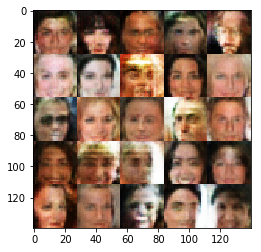

Epoch 1/1 Step 5810... Discriminator Loss: 1.4322... Generator Loss: 0.8073...
Epoch 1/1 Step 5820... Discriminator Loss: 1.4456... Generator Loss: 0.6472...
Epoch 1/1 Step 5830... Discriminator Loss: 1.4047... Generator Loss: 0.7184...
Epoch 1/1 Step 5840... Discriminator Loss: 1.4454... Generator Loss: 0.7150...
Epoch 1/1 Step 5850... Discriminator Loss: 1.4315... Generator Loss: 0.8239...
Epoch 1/1 Step 5860... Discriminator Loss: 1.4747... Generator Loss: 0.5933...
Epoch 1/1 Step 5870... Discriminator Loss: 1.4587... Generator Loss: 0.6954...
Epoch 1/1 Step 5880... Discriminator Loss: 1.5008... Generator Loss: 0.5859...
Epoch 1/1 Step 5890... Discriminator Loss: 1.4646... Generator Loss: 0.7049...
Epoch 1/1 Step 5900... Discriminator Loss: 1.4697... Generator Loss: 0.7413...


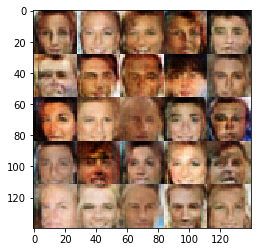

Epoch 1/1 Step 5910... Discriminator Loss: 1.4568... Generator Loss: 0.7711...
Epoch 1/1 Step 5920... Discriminator Loss: 1.4046... Generator Loss: 0.7471...
Epoch 1/1 Step 5930... Discriminator Loss: 1.4521... Generator Loss: 0.7454...
Epoch 1/1 Step 5940... Discriminator Loss: 1.4536... Generator Loss: 0.7219...
Epoch 1/1 Step 5950... Discriminator Loss: 1.4521... Generator Loss: 0.8506...
Epoch 1/1 Step 5960... Discriminator Loss: 1.4357... Generator Loss: 0.6882...
Epoch 1/1 Step 5970... Discriminator Loss: 1.4173... Generator Loss: 0.7600...
Epoch 1/1 Step 5980... Discriminator Loss: 1.4185... Generator Loss: 0.7793...
Epoch 1/1 Step 5990... Discriminator Loss: 1.4422... Generator Loss: 0.8849...
Epoch 1/1 Step 6000... Discriminator Loss: 1.4181... Generator Loss: 0.7542...


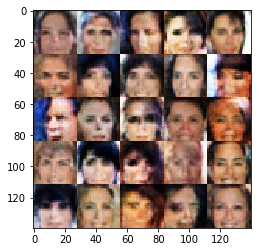

Epoch 1/1 Step 6010... Discriminator Loss: 1.4890... Generator Loss: 0.6685...
Epoch 1/1 Step 6020... Discriminator Loss: 1.4295... Generator Loss: 0.7935...
Epoch 1/1 Step 6030... Discriminator Loss: 1.4753... Generator Loss: 0.7123...
Epoch 1/1 Step 6040... Discriminator Loss: 1.4071... Generator Loss: 0.7698...
Epoch 1/1 Step 6050... Discriminator Loss: 1.4441... Generator Loss: 0.6932...
Epoch 1/1 Step 6060... Discriminator Loss: 1.4242... Generator Loss: 0.7102...
Epoch 1/1 Step 6070... Discriminator Loss: 1.4208... Generator Loss: 0.6862...
Epoch 1/1 Step 6080... Discriminator Loss: 1.4683... Generator Loss: 0.7171...
Epoch 1/1 Step 6090... Discriminator Loss: 1.4634... Generator Loss: 0.7189...
Epoch 1/1 Step 6100... Discriminator Loss: 1.4205... Generator Loss: 0.6945...


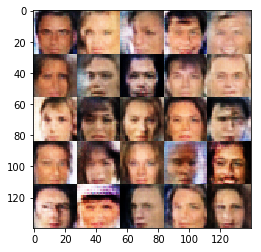

Epoch 1/1 Step 6110... Discriminator Loss: 1.4753... Generator Loss: 0.6403...
Epoch 1/1 Step 6120... Discriminator Loss: 1.4431... Generator Loss: 0.7301...
Epoch 1/1 Step 6130... Discriminator Loss: 1.4465... Generator Loss: 0.7067...
Epoch 1/1 Step 6140... Discriminator Loss: 1.4036... Generator Loss: 0.7035...
Epoch 1/1 Step 6150... Discriminator Loss: 1.4615... Generator Loss: 0.6452...
Epoch 1/1 Step 6160... Discriminator Loss: 1.4309... Generator Loss: 0.7022...
Epoch 1/1 Step 6170... Discriminator Loss: 1.4276... Generator Loss: 0.7235...
Epoch 1/1 Step 6180... Discriminator Loss: 1.4204... Generator Loss: 0.7989...
Epoch 1/1 Step 6190... Discriminator Loss: 1.4196... Generator Loss: 0.7224...
Epoch 1/1 Step 6200... Discriminator Loss: 1.4406... Generator Loss: 0.6657...


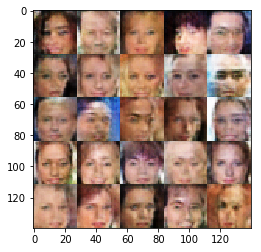

Epoch 1/1 Step 6210... Discriminator Loss: 1.4544... Generator Loss: 0.7354...
Epoch 1/1 Step 6220... Discriminator Loss: 1.4340... Generator Loss: 0.7443...
Epoch 1/1 Step 6230... Discriminator Loss: 1.4941... Generator Loss: 0.6319...
Epoch 1/1 Step 6240... Discriminator Loss: 1.4184... Generator Loss: 0.6934...
Epoch 1/1 Step 6250... Discriminator Loss: 1.4152... Generator Loss: 0.7058...
Epoch 1/1 Step 6260... Discriminator Loss: 1.4357... Generator Loss: 0.6533...
Epoch 1/1 Step 6270... Discriminator Loss: 1.4225... Generator Loss: 0.6464...
Epoch 1/1 Step 6280... Discriminator Loss: 1.4163... Generator Loss: 0.8475...
Epoch 1/1 Step 6290... Discriminator Loss: 1.4340... Generator Loss: 0.6529...
Epoch 1/1 Step 6300... Discriminator Loss: 1.4473... Generator Loss: 0.6688...


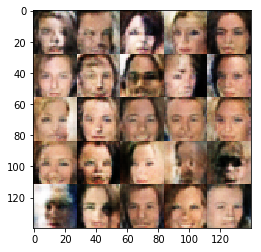

Epoch 1/1 Step 6310... Discriminator Loss: 1.4623... Generator Loss: 0.8046...
Epoch 1/1 Step 6320... Discriminator Loss: 1.5104... Generator Loss: 0.6430...
Epoch 1/1 Step 6330... Discriminator Loss: 1.4797... Generator Loss: 0.7579...


In [15]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))

with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.